# Project: compressive strength of concrete
By: 

In [1]:
#importing modules and packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.pipeline import make_pipeline


In [2]:
#Loading in the data
data = pd.read_csv('Concrete_DatA.csv',sep=';')

#adjusting the names of the columns in the datatset
data.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)':'Cement', 
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast furnace slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly ash', 
    'Water  (component 4)(kg in a m^3 mixture)':'Water', 
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse aggregate', 
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine aggregate', 
    'Age (day)':'Age', 
    'Concrete compressive strength(MPa, megapascals) ':'Concrete compressive strength'
}, inplace=True)

#looking at it
data.head()

,Cement,Blast furnace slag,Fly ash,Water,Superplasticizer,Coarse aggregate,Fine aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
#Obtaining statistics on the dataset (maybe not needed)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast furnace slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Concrete compressive strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


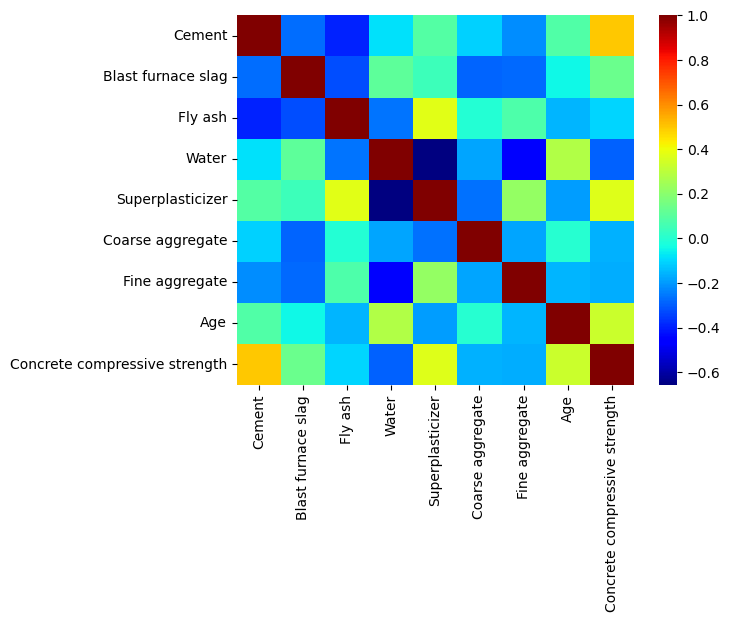

In [4]:
#Plotting a heatmap to show the correlation between the features
plt.figure
sns.heatmap(data.corr(),cmap = 'jet')
#plt.tight_layout()
plt.show()

## Scaling and PCA
### Scaling the data

In [5]:
scaled_data = StandardScaler().fit_transform(data)

scaled_data=pd.DataFrame(scaled_data,columns=data.columns)
scaled_data.head()

#checking to see that the means are standardised
#print(f" Means: {scaled_data.mean(axis=0)}")

#checking to see that the standard deviations are standardised
#print(f"\n Std: {scaled_data.std(axis=0)}")

,Cement,Blast furnace slag,Fly ash,Water,Superplasticizer,Coarse aggregate,Fine aggregate,Age,Concrete compressive strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


### PCA
Let's predict the concrete compressive strength

In [6]:
pca_data = PCA().fit(scaled_data[['Cement', 'Blast furnace slag', 'Fly ash', 'Water'
        , 'Superplasticizer', 'Coarse aggregate', 'Fine aggregate','Age']])


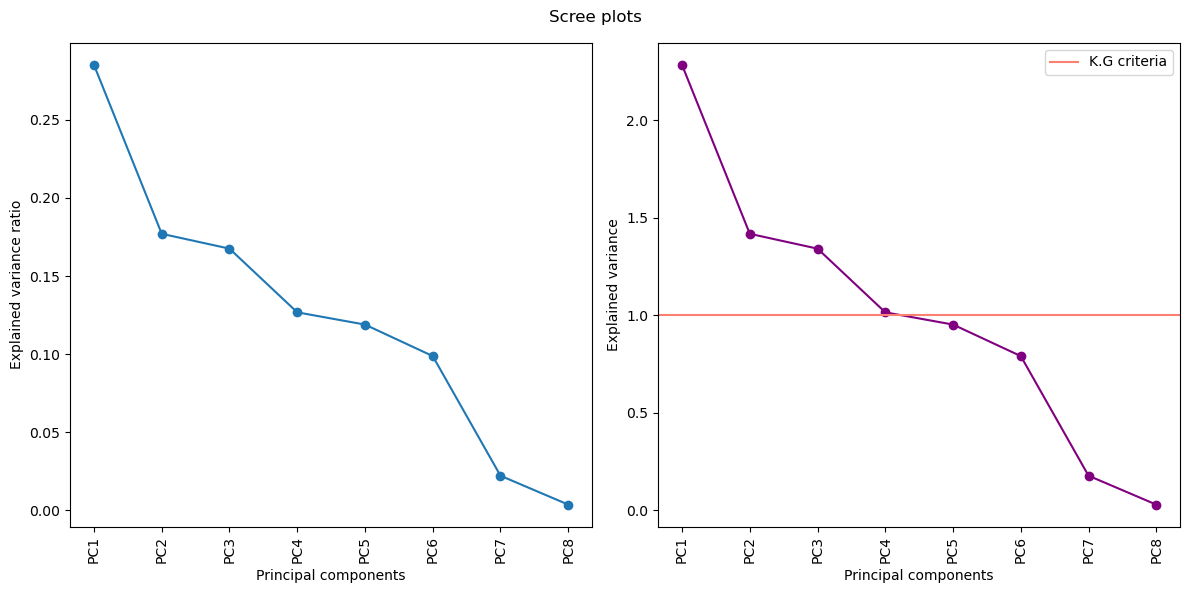

In [7]:
#Making a screeplot to help determine how many principal components to keep

fig,ax = plt.subplots(ncols = 2,figsize=(12,6))

fig.suptitle('Scree plots')


ax[0].plot(pca_data.explained_variance_ratio_,'o-')
ax[0].set_xlabel('Principal components')
ax[0].set_ylabel('Explained variance ratio')
ax[0].set_xticks(range(len(pca_data.components_)))
ax[0].set_xticklabels([f"PC{i+1}" for i in range(len(pca_data.explained_variance_ratio_))],rotation = 90)



ax[1].plot(pca_data.explained_variance_,'o-',color='purple')
ax[1].set_xlabel('Principal components')
ax[1].set_ylabel('Explained variance')
ax[1].set_xticks(range(len(pca_data.components_)))
ax[1].set_xticklabels([f"PC{i+1}" for i in range(len(pca_data.explained_variance_))],rotation = 90)

#adding a line for the kaiser-guttman criteria
ax[1].axhline(y=1,color='salmon',label = 'K.G criteria')
ax[1].legend()

plt.tight_layout()
plt.show()


Using the Kaiser-Guttman criterion, 4 principal components are kept

In [8]:
print(f"The first four PCs explain {np.round(np.sum(pca_data.explained_variance_ratio_[:4])*100)} % of the variance")

The first four PCs explain 76.0 % of the variance


In [9]:
#Eigenvectors
pca_data_eigen = pd.DataFrame(
    pca_data.components_.T[:,:5],
    columns=["PC1", "PC2", "PC3", "PC4", "PC5"],
    index=scaled_data[['Cement', 'Blast furnace slag', 'Fly ash', 'Water',
        'Superplasticizer', 'Coarse aggregate', 'Fine aggregate', 'Age']].columns,
)

#computing the score
pca_data_scores = pd.DataFrame(
    pca_data.transform(scaled_data[['Cement', 'Blast furnace slag', 'Fly ash', 'Water',
        'Superplasticizer', 'Coarse aggregate', 'Fine aggregate', 'Age']])[:, :5],
    columns=["PC1", "PC2", "PC3", "PC4", "PC5"], 
    index=scaled_data.index  # Maintain the same index as the original data
)


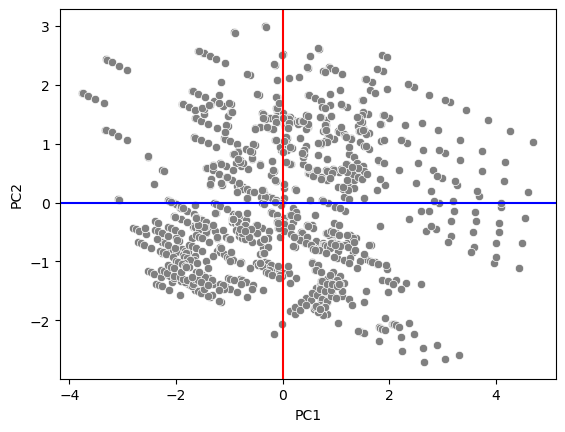

In [10]:
# Plot the scores
sns.scatterplot(data=pca_data_scores, x="PC1", y="PC2", color="grey")
plt.axhline(0, color="blue")
plt.axvline(0, color="red")
plt.show()

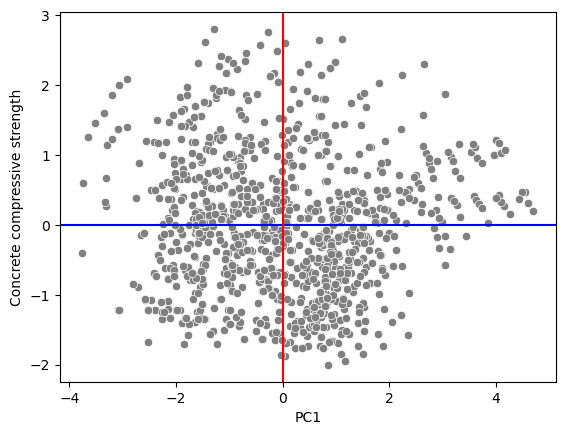

In [11]:
# Plot the scores
sns.scatterplot(x=pca_data_scores["PC1"], y=scaled_data['Concrete compressive strength'], color="grey")
plt.axhline(0, color="blue")
plt.axvline(0, color="red")
plt.show()

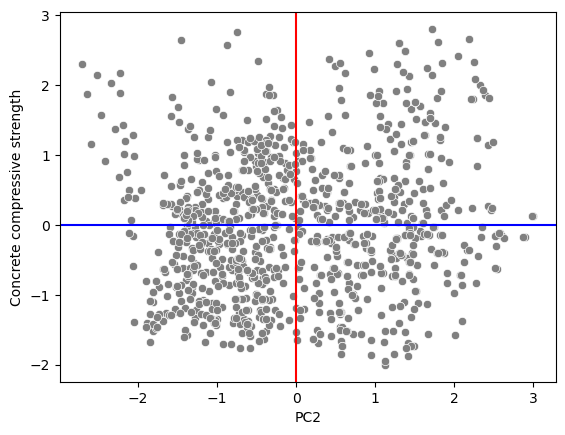

In [12]:
# Plot the scores
sns.scatterplot(x=pca_data_scores["PC2"], y=scaled_data['Concrete compressive strength']
            , color="grey")
plt.axhline(0, color="blue")
plt.axvline(0, color="red")
plt.show()

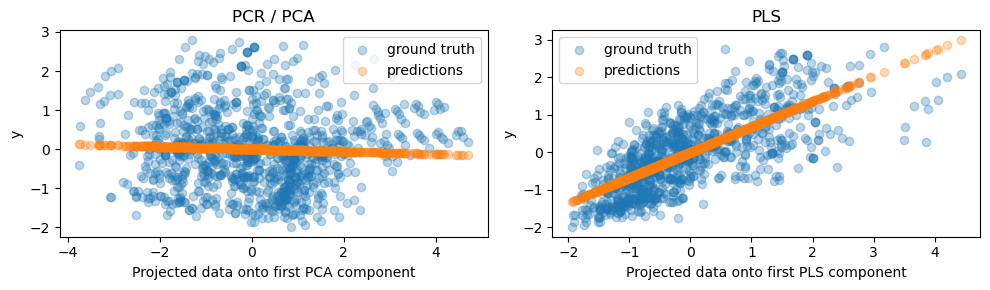

In [14]:
rng = np.random.RandomState(0)

X_train=scaled_data[['Cement', 'Blast furnace slag', 'Fly ash', 'Water',
        'Superplasticizer', 'Coarse aggregate', 'Fine aggregate',
        'Age']]
y_train=scaled_data['Concrete compressive strength']


pcr = make_pipeline(PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_train), y_train, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_train), pcr.predict(X_train), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_train), y_train, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_train), pls.predict(X_train), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()

In [15]:
print(f"PCR r-squared {pcr.score(X_train, y_train):.3f}")
print(f"PLS r-squared {pls.score(X_train, y_train):.3f}")

PCR r-squared 0.002
PLS r-squared 0.550


=> PLS better

In [16]:
pca_2 = make_pipeline(PCA(n_components=2), LinearRegression())
pca_2.fit(X_train, y_train)
pls_2 = PLSRegression(n_components=2)
pls_2.fit(X_train, y_train)

print(f"PCR r-squared with 2 components {pca_2.score(X_train, y_train):.3f}")
print(f"PLS r-squared with 2 components {pls_2.score(X_train, y_train):.3f}")

PCR r-squared with 2 components 0.032
PLS r-squared with 2 components 0.582


In [17]:
pca_3 = make_pipeline(PCA(n_components=3), LinearRegression())
pca_3.fit(X_train, y_train)
pls_3 = PLSRegression(n_components=3)
pls_3.fit(X_train, y_train)

print(f"PCR r-squared with 3 components {pca_3.score(X_train, y_train):.3f}")
print(f"PLS r-squared with 3 components {pls_3.score(X_train, y_train):.3f}")

PCR r-squared with 3 components 0.333
PLS r-squared with 3 components 0.591


In [19]:
pca_4 = make_pipeline(PCA(n_components=4), LinearRegression())
pca_4.fit(X_train, y_train)
pls_4 = PLSRegression(n_components=4)
pls_4.fit(X_train, y_train)

print(f"PCR r-squared with 4 components {pca_4.score(X_train, y_train):.3f}")
print(f"PLS r-squared with 4 components {pls_4.score(X_train, y_train):.3f}")

PCR r-squared with 4 components 0.333
PLS r-squared with 4 components 0.605


In [21]:
pca_5 = make_pipeline(PCA(n_components=5), LinearRegression())
pca_5.fit(X_train, y_train)
pls_5 = PLSRegression(n_components=5)
pls_5.fit(X_train, y_train)

print(f"PCR r-squared with 5 components {pca_5.score(X_train, y_train):.3f}")
print(f"PLS r-squared with 5 components {pls_5.score(X_train, y_train):.3f}")

PCR r-squared with 5 components 0.441
PLS r-squared with 5 components 0.607


Test-train split

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


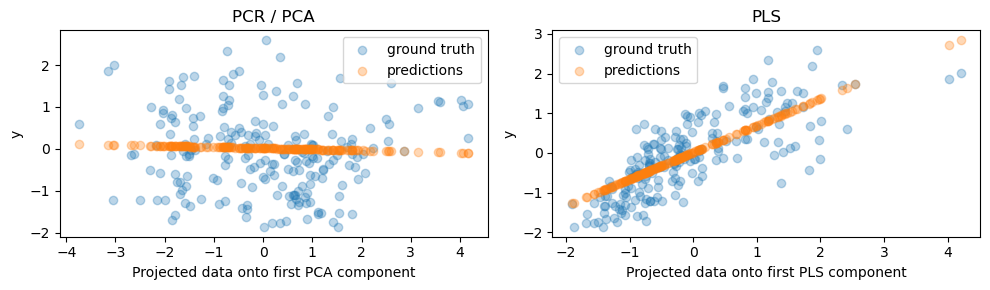

In [23]:
rng = np.random.RandomState(0)

X_train, X_test, y_train, y_test = train_test_split(scaled_data[['Cement', 'Blast furnace slag', 'Fly ash', 'Water',
        'Superplasticizer', 'Coarse aggregate', 'Fine aggregate',
        'Age']], scaled_data['Concrete compressive strength'],test_size=0.2, random_state=rng)


pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()


In [24]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PCR r-squared -0.005
PLS r-squared 0.601
